In [403]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from collections import Iterator 
import statsmodels.api as sm
import itertools

In [345]:
#加载xlsx房屋数据
df = pd.read_excel("house_price_regression.xlsx")

In [346]:
df.head()

,url,title,age,area,floor_info,direction,layout,price
0,http://esf.sh.fang.com/chushou/3_289079207.htm,"新出笋盘,业主急售,低于市场价30万,精装南北通,近11/12号线",建筑年代：1998\r\n,65,中层(共6层)\r\n,南北向\r\n,\r\n 2室1厅\r\n ...,3500000
1,http://esf.sh.fang.com/chushou/3_290295785.htm,"业主急抛,低于市场价50万,双南双天井,闹中取静,近3/12号线!",建筑年代：1996\r\n,90,低层(共6层)\r\n,南北向\r\n,\r\n 3室2厅\r\n ...,5000000
2,http://esf.sh.fang.com/chushou/3_290971789.htm,新出笋盘 近11号线 东边套 低于市价50万 送20平米花园 急售,建筑年代：1998\r\n,72,低层(共6层)\r\n,南向\r\n,\r\n 2室1厅\r\n ...,3980000
3,http://esf.sh.fang.com/chushou/3_290987582.htm,"业主出国急售:板式两房,精装修全明,带产权车位,看房方便!",建筑年代：2006\r\n,96,高层(共7层)\r\n,南北向\r\n,\r\n 2室2厅\r\n ...,5500000
4,http://esf.sh.fang.com/chushou/3_291070232.htm,"徐汇滨江板块,双南两居,小高层带电梯,使用面积大,近3,11号线",建筑年代：1996\r\n,86,中层(共7层)\r\n,南向\r\n,\r\n 2室1厅\r\n ...,4500000


In [347]:
#数据整理
#删除url、titile
del df["url"]
del df["title"]

In [348]:
df.head()

,age,area,floor_info,direction,layout,price
0,建筑年代：1998\r\n,65,中层(共6层)\r\n,南北向\r\n,\r\n 2室1厅\r\n ...,3500000
1,建筑年代：1996\r\n,90,低层(共6层)\r\n,南北向\r\n,\r\n 3室2厅\r\n ...,5000000
2,建筑年代：1998\r\n,72,低层(共6层)\r\n,南向\r\n,\r\n 2室1厅\r\n ...,3980000
3,建筑年代：2006\r\n,96,高层(共7层)\r\n,南北向\r\n,\r\n 2室2厅\r\n ...,5500000
4,建筑年代：1996\r\n,86,中层(共7层)\r\n,南向\r\n,\r\n 2室1厅\r\n ...,4500000


In [349]:
type(df["age"])
#计算房龄
df["age"] = df["age"].map(lambda e:2017-int(e.strip().strip("建筑年代：")))

In [350]:
df["age"].head()

0    19
1    21
2    19
3    11
4    21
Name: age, dtype: int64

In [351]:
#抽取室、厅
df[["室","厅"]] = df["layout"].str.extract("(\d+)室(\d+)厅")

D:\softwares\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [352]:
df["室"] = df["室"].astype(int)
df["厅"] = df["厅"].astype(int)
df[["室","厅"]].head()
df["厅"].head()

0    1
1    2
2    1
3    2
4    1
Name: 厅, dtype: int32

In [353]:
#抽取朝向
df["direction"] = df["direction"].map(lambda e: e.strip())

In [354]:
df["direction"].head()

0    南北向
1    南北向
2     南向
3    南北向
4     南向
Name: direction, dtype: object

In [355]:
#抽取层
df["total_floor"] = df["floor_info"].str.extract("共(\d+)层")

D:\softwares\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [356]:
df["total_floor"].head()

0    6
1    6
2    6
3    7
4    7
Name: total_floor, dtype: object

In [357]:
#将total_floor装换成int
df["total_floor"] = df["total_floor"].astype(int)

In [358]:
df["total_floor"].head()

0    6
1    6
2    6
3    7
4    7
Name: total_floor, dtype: int32

In [359]:
#抽取楼层类型
df["楼层类型"] = df["floor_info"].str.extract("^(.层)")

D:\softwares\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [360]:
df["楼层类型"].head()

0    中层
1    低层
2    低层
3    高层
4    中层
Name: 楼层类型, dtype: object

In [361]:
#组合数据
df.head()

,age,area,floor_info,direction,layout,price,室,厅,total_floor,楼层类型
0,19,65,中层(共6层)\r\n,南北向,\r\n 2室1厅\r\n ...,3500000,2,1,6,中层
1,21,90,低层(共6层)\r\n,南北向,\r\n 3室2厅\r\n ...,5000000,3,2,6,低层
2,19,72,低层(共6层)\r\n,南向,\r\n 2室1厅\r\n ...,3980000,2,1,6,低层
3,11,96,高层(共7层)\r\n,南北向,\r\n 2室2厅\r\n ...,5500000,2,2,7,高层
4,21,86,中层(共7层)\r\n,南向,\r\n 2室1厅\r\n ...,4500000,2,1,7,中层


In [362]:
del df["layout"]
del df["floor_info"]


In [363]:
df.head()

,age,area,direction,price,室,厅,total_floor,楼层类型
0,19,65,南北向,3500000,2,1,6,中层
1,21,90,南北向,5000000,3,2,6,低层
2,19,72,南向,3980000,2,1,6,低层
3,11,96,南北向,5500000,2,2,7,高层
4,21,86,南向,4500000,2,1,7,中层


In [364]:
#将离散值求dummy variable
floor_dummy = pd.get_dummies(df["楼层类型"])
direction_dummy = pd.get_dummies(df["direction"])

In [365]:
#组合
df = pd.concat([df,floor_dummy,direction_dummy],axis=1)

In [366]:
#删除离散值、删除多重共线性
del df["direction"]
del df["楼层类型"]
del df["南北向"]
del df["高层"]

In [367]:
df

,age,area,price,室,厅,total_floor,中层,低层,东南向,东向,南向,西南向,西向
0,19,65,3500000,2,1,6,1,0,0,0,0,0,0
1,21,90,5000000,3,2,6,0,1,0,0,0,0,0
2,19,72,3980000,2,1,6,0,1,0,0,1,0,0
3,11,96,5500000,2,2,7,0,0,0,0,0,0,0
4,21,86,4500000,2,1,7,1,0,0,0,1,0,0
5,21,56,3100000,2,1,6,1,0,0,0,0,0,0
6,17,95,4200000,2,2,6,0,1,0,0,0,0,0
7,13,158,9500000,3,2,16,1,0,0,0,0,0,0
8,14,125,9200000,3,2,12,0,0,0,0,0,0,0
9,6,88,5500000,2,2,14,1,0,0,0,1,0,0


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2792 entries, 0 to 2791
Data columns (total 13 columns):
age            2792 non-null int64
area           2792 non-null int64
price          2792 non-null int64
室              2792 non-null int32
厅              2792 non-null int32
total_floor    2792 non-null int32
中层             2792 non-null uint8
低层             2792 non-null uint8
东南向            2792 non-null uint8
东向             2792 non-null uint8
南向             2792 non-null uint8
西南向            2792 non-null uint8
西向             2792 non-null uint8
dtypes: int32(3), int64(3), uint8(7)
memory usage: 139.1 KB


In [369]:
#简单线性回归
X = df["area"]
Y = df["price"]

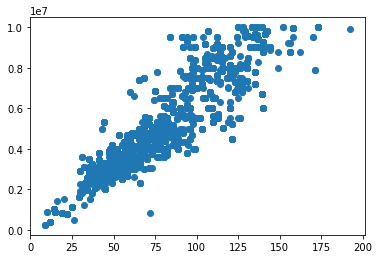

In [370]:
plt.scatter(X,Y)
plt.show()

Populating the interactive namespace from numpy and matplotlib
[-9165.21745733] [[ 64846.01038065]]


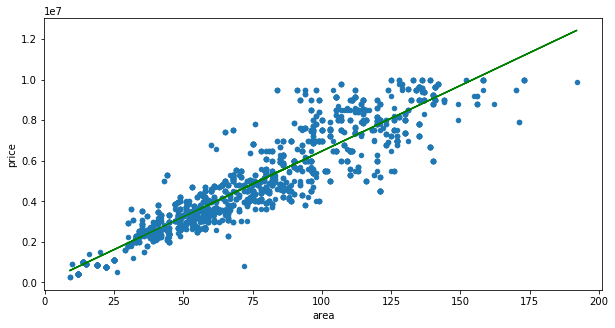

In [371]:
%pylab inline
df[["price","area"]].plot(kind="scatter",x="area",y="price",figsize=[10,5])
#取出面积进行单变量的线性回归
linear = LinearRegression()
model = linear.fit(df[["area"]],df[["price"]])
print(model.intercept_,model.coef_)
#用model计算给定面积的房价
Y_ = model.predict(df[["area"]])
plt.plot(df[["area"]],Y_,color="green")
plt.show()

In [372]:
#多元线性回归
cols = ["age","area","price","室","厅","total_floor","中层","低层","东南向","东向","南向","西南向","西向"]
X = df[cols]
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [373]:
X.head()

,age,area,price,室,厅,total_floor,中层,低层,东南向,东向,南向,西南向,西向
0,19,65,3500000,2,1,6,1,0,0,0,0,0,0
1,21,90,5000000,3,2,6,0,1,0,0,0,0,0
2,19,72,3980000,2,1,6,0,1,0,0,1,0,0
3,11,96,5500000,2,2,7,0,0,0,0,0,0,0
4,21,86,4500000,2,1,7,1,0,0,0,1,0,0


In [387]:
Y = df['price'].values
df.head()

,age,area,price,室,厅,total_floor,中层,低层,东南向,东向,南向,西南向,西向
0,19,65,3500000,2,1,6,1,0,0,0,0,0,0
1,21,90,5000000,3,2,6,0,1,0,0,0,0,0
2,19,72,3980000,2,1,6,0,1,0,0,1,0,0
3,11,96,5500000,2,2,7,0,0,0,0,0,0,0
4,21,86,4500000,2,1,7,1,0,0,0,1,0,0


In [388]:
print(type(Y))

<class 'numpy.ndarray'>


In [390]:
linear_multi = LinearRegression()
model = linear_multi.fit(X,Y)
print(model.intercept_,model.coef_)
print(model)
X.info()

-6.51925802231e-09 [  1.08954724e-10  -3.35779182e-11   1.00000000e+00   1.62296524e-10
   8.13563024e-10   8.34402830e-12   1.52512966e-10  -3.90760382e-10
  -8.30078245e-11   2.31727713e-10  -1.09178171e-10  -8.96042853e-12
  -5.13335063e-11]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2792 entries, 0 to 2791
Data columns (total 13 columns):
age            2792 non-null int64
area           2792 non-null int64
price          2792 non-null int64
室              2792 non-null int32
厅              2792 non-null int32
total_floor    2792 non-null int32
中层             2792 non-null uint8
低层             2792 non-null uint8
东南向            2792 non-null uint8
东向             2792 non-null uint8
南向             2792 non-null uint8
西南向            2792 non-null uint8
西向             2792 non-null uint8
dtypes: int32(3), int64(3), uint8(7)
memory usage: 219.1 KB


In [398]:
#使用假设检验法
import statsmodels.api as sm
a = df["price"].values
b = df[["age","area","室","厅","total_floor","中层","低层","东南向","东向","南向","西南向","西向"]]
b_ = sm.add_constant(b)
#使用最小平方法
result = sm.OLS(a,b_)
#fit方法运行计算
summary = result.fit()
#调用summary2方法，打印出假设检验的系列信息
print(summary.summary2())
#名词解释：



                         Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.680     
Dependent Variable:       y                    AIC:                    86779.1096
Date:                     2017-11-09 22:28     BIC:                    86844.3893
No. Observations:         2792                 Log-Likelihood:         -43379.   
Df Model:                 10                   F-statistic:            593.9     
Df Residuals:             2781                 Prob (F-statistic):     0.00      
R-squared:                0.681                Scale:                  1.8377e+12
---------------------------------------------------------------------------------
                Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
---------------------------------------------------------------------------------
const       -1407851.5185 113623.6900 -12.3905 0.0000 -1630646.8244 -1185056.2126
室            1519059.9594  40040.0281  37

In [414]:
#寻找最小AIC的属性组合

fileds = ["age","area","室","厅","total_floor","中层","低层","东南向","东向","南向","西南向","西向"]
df[fileds].head()
acis = {}
for i in range(1,len(fileds)+1):
    for virables in itertools.combinations(fileds,i):
        x1 = sm.add_constant(df[list(virables)])
        x2 = sm.OLS(Y,x1)
        res = x2.fit()
        acis[virables] = res.aic

In [427]:
from  collections import Counter
counter = Counter(acis)
counter.most_common()[::-10]

[(('age', 'area', '室', 'total_floor', '中层', '东南向', '东向', '南向', '西南向', '西向'),
  84662.966235425629),
 (('age', 'area', '室', 'total_floor', '中层', '东向', '南向', '西南向'),
  84670.325585499668),
 (('age', 'area', '室', 'total_floor', '中层', '南向', '西南向', '西向'),
  84673.843801994037),
 (('area', '室', 'total_floor', '中层', '东向', '南向', '西南向', '西向'),
  84678.757206266499),
 (('area', '室', 'total_floor', '中层', '东南向', '东向', '南向', '西南向'),
  84681.895271412403),
 (('area', '室', 'total_floor', '中层', '低层', '东南向', '南向', '西南向', '西向'),
  84684.520119580906),
 (('age', 'area', '室', 'total_floor', '中层', '东向', '西南向'), 84687.261020931037),
 (('area', '室', '厅', 'total_floor', '中层', '低层', '南向', '西南向', '西向'),
  84689.561001611248),
 (('age', 'area', '室', 'total_floor', '中层', '东南向', '西南向', '西向'),
  84696.231866024056),
 (('age', 'area', '室', 'total_floor', '中层', '西南向'), 84700.799353998533),
 (('age', 'area', '室', '中层', '低层', '东南向', '东向', '南向', '西南向', '西向'),
  84705.341017144761),
 (('age', 'area', '室', '中层', '东向', '南向